# Useful links

- [ ] https://cran.r-project.org/web/packages/afex/vignettes/introduction-mixed-models.pdf
- [ ] https://cran.r-project.org/web/packages/afex/afex.pdf
- [ ] https://cran.r-project.org/web/packages/afex/index.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_analysing_accuracy_data.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_anova_example.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/messy-data.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/interactions.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/basics.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html

- [ ] https://osf.io/nfwx7/

- [ ] https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

- [ ] https://psu-psychology.github.io/r-bootcamp-2018/index.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html
- [ ] http://singmann.org/anova-in-r-afex-may-be-the-solution-you-are-looking-for/
- [ ] https://ademos.people.uic.edu/Chapter21.html
- [ ] https://www.psychologie.uni-heidelberg.de/ae/meth/team/mertens/blog/anova_in_r_made_easy.nb.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html

# Setup

## Imports

In [1]:
library("dplyr")
library("tidyr")
library("afex")     # provides mixed() and attaches lme4 automatically.
library("emmeans")  # follow-up tests.
library("multcomp") # advanced control for multiple testing/Type 1 errors.
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'KR', 'S', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: library('emmeans') now needs to be called explicitly!
- Get and set global pac

In [2]:
library("car")
require("lattice")
require("ez")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: lattice

Loading required package: ez



In [3]:
library("cowplot")
library("ggbeeswarm")

In [4]:
library("nortest")

## Settings

In [5]:
theme_set(theme_bw(base_size = 15) +
            theme(legend.position="bottom",
                  panel.grid.major.x = element_blank()))

In [6]:
options(width=120)

In [7]:
options(width=77)

## Info

In [8]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_IL.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_IL.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_IL.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_IL.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] nortest_1.0-4    ggbeeswarm_0.6.0 cowplot_1.1.0    ez_4.4-0        
 [5] lattice_0.20-41  car_3.0-10       carData_3.0-4    ggplot2_3.3.2   
 [9] multcomp_1.4-14  TH.data_1.0-10   MASS_7.3-53      survival_3.2-7  
[13] mvtnorm_1.1-1    emmeans_1.5.1    afex_0.28-0 

## Handy functions

### Function for logging information BEFORE execution

In [9]:
logging0 <- function(idPath,ifName,odPath,infoStr="",data){
    t0 <- Sys.time()
    ifPath <- file.path(idPath,ifName)
    ofTime <- gsub("\\s","_",t0)
    ofTemp <- substr(paste(gsub("^.","",tempfile("","","")),gsub("^.","",tempfile("","","")),sep=""),0,12)
    ofName <- paste(paste(ifName,"",ofTime,"",ofTemp,infoStr,"_nrow",nrow(data),sep="_"),".RData",sep="")
    ofPath <- file.path(odPath,ofName)
    lfPath = paste(ofPath ,".LOG.txt" ,sep="" ,collapse = "")
    log_msg <- toString(paste(
        paste("ifPath" ,toString(ifPath)     ,sep=": " ,collapse = "")        
      , paste("ofPath" ,toString(ofPath)     ,sep=": " ,collapse = "")        
      , paste("lfPath" ,toString(lfPath)     ,sep=": " ,collapse = "")
      , paste("timeSt" ,toString(Sys.time()) ,sep=": " ,collapse = "")
      , paste("nrows " ,toString(nrow(data)) ,sep=": " ,collapse = "")
      , paste("ncols " ,toString(ncol(data)) ,sep=": " ,collapse = "")
      , paste("vList " ,toString(ls())       ,sep=": " ,collapse = "")
      , "\n"
      , sep="\n"))
    cat(log_msg)
    write(paste(log_msg) ,file=lfPath ,append=TRUE)
    return(list("ofPath"=ofPath,"lfPath"=lfPath,"t0"=t0))
}

### Function for logging information AFTER execution

In [10]:
logging1 <- function(lfName,t0){
    t1 <- Sys.time()
    d1 <- t1-t0
    log_msg <- toString(paste(
        paste("time1" ,toString(Sys.time()) ,sep=": " ,collapse = "")
      , paste("diff1" ,capture.output(d1)   ,sep=": " ,collapse = "")
      , "\n"
      , sep="\n"))
    cat(log_msg)
    write(paste(log_msg) ,file=lfName ,append=TRUE)
    return(list("d1" = d1))
}

# Set in/output directories

In [11]:
idPath <- file.path("data","t1305")
odPath <- file.path("data","t1306")
print(idPath)
print(odPath)

[1] "data/t1305"
[1] "data/t1306"


In [12]:
dir.create(odPath,showWarnings = FALSE,recursive = TRUE)

In [13]:
ifName <- "bigDF__df2.RData" # 752554 obs
ifPath <- file.path(idPath,ifName)
print(ifPath)

[1] "data/t1305/bigDF__df2.RData"


# Load data

Depending on how much data you want to include select a file to be loaded (either by executing relevant cell or by clicking ↑ or ↓ above to move cells up or down, the last executed cell containing `ifName` defines the file to be loaded).

In [14]:
load(file=ifPath)

## Subset to 13 days

In [15]:
df2 <- subset(df2,day<14) # 752554 -> 717219 

## Center on DAY

In [ ]:
df2$DAY <- scale(df2$day, scale = FALSE)

# Quick look at data

In [16]:
str(df2, width=88,strict.width="cut")

'data.frame':	717219 obs. of  33 variables:
 $ LBL              : Factor w/ 4 levels "metoo_ctrl","metoo_orig",..: 1 1 1 1 1 1 1 1..
 $ CAMP             : Factor w/ 2 levels "metoo","sexstrike": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE             : Factor w/ 2 levels "ctrl","orig": 1 1 1 1 1 1 1 1 1 1 ...
 $ wordCnt          : int  11 7 11 27 30 26 8 12 12 23 ...
 $ vb01Cnt          : int  0 0 0 2 0 0 1 0 1 0 ...
 $ nn01Cnt          : int  1 2 0 2 3 4 1 4 1 4 ...
 $ ag01Cnt          : int  0 0 0 0 1 1 0 0 1 2 ...
 $ ag02Cnt          : int  0 0 0 0 1 0 0 0 1 0 ...
 $ vb01Prc          : num  0 0 0 0.0741 0 ...
 $ nn01Prc          : num  0.0909 0.2857 0 0.0741 0.1 ...
 $ ag01Prc          : num  0 0 0 0 0.0333 ...
 $ ag02Prc          : num  0 0 0 0 0.0333 ...
 $ ID               : chr  "919714354467045376" "919714354479722496" "919714354500653"..
 $ init             : Date, format: "2017-10-15" "2017-10-15" ...
 $ date             : Date, format: "2017-10-15" "2017-10-15" ...
 $ day              :

In [17]:
for (ii in colnames(df2)){
    cat("\n")
    print(summary(df2[ii]))
}


             LBL        
 metoo_ctrl    :350770  
 metoo_orig    :291735  
 sexstrike_ctrl: 44449  
 sexstrike_orig: 30265  

        CAMP       
 metoo    :642505  
 sexstrike: 74714  

   TYPE       
 ctrl:395219  
 orig:322000  

    wordCnt      
 Min.   :  1.00  
 1st Qu.:  9.00  
 Median : 17.00  
 Mean   : 16.95  
 3rd Qu.: 24.00  
 Max.   :106.00  

    vb01Cnt       
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.7471  
 3rd Qu.: 1.0000  
 Max.   :17.0000  

    nn01Cnt      
 Min.   : 0.000  
 1st Qu.: 2.000  
 Median : 3.000  
 Mean   : 3.488  
 3rd Qu.: 5.000  
 Max.   :43.000  

    ag01Cnt       
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.6358  
 3rd Qu.: 1.0000  
 Max.   :21.0000  

    ag02Cnt      
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.2344  
 3rd Qu.:0.0000  
 Max.   :7.0000  

    vb01Prc       
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.00000  
 Mean   :0.04486  
 3rd Qu.:0.07143  
 Ma

In [18]:
df2 %>%
    group_by(CAMP,TYPE) %>%
    summarise(n = n(), .groups = "drop") 

CAMP,TYPE,n
<fct>,<fct>,<int>
metoo,ctrl,350770
metoo,orig,291735
sexstrike,ctrl,44449
sexstrike,orig,30265


In [19]:
df2 %>%
    group_by(CAMP,TYPE) %>%
    summarize(lPW = paste(unique(day), collapse = ","), .groups = "drop")


CAMP,TYPE,lPW
<fct>,<fct>,<chr>
metoo,ctrl,"1,2,3,4,5,6,7,8,9,10,11,12,13"
metoo,orig,"1,2,3,4,5,6,7,8,9,10,11,12,13"
sexstrike,ctrl,"1,2,3,4,5,6,7,8,9,10,11,12,13"
sexstrike,orig,"1,2,3,4,5,6,7,8,9,10,11,12,13"


# Overview Plot

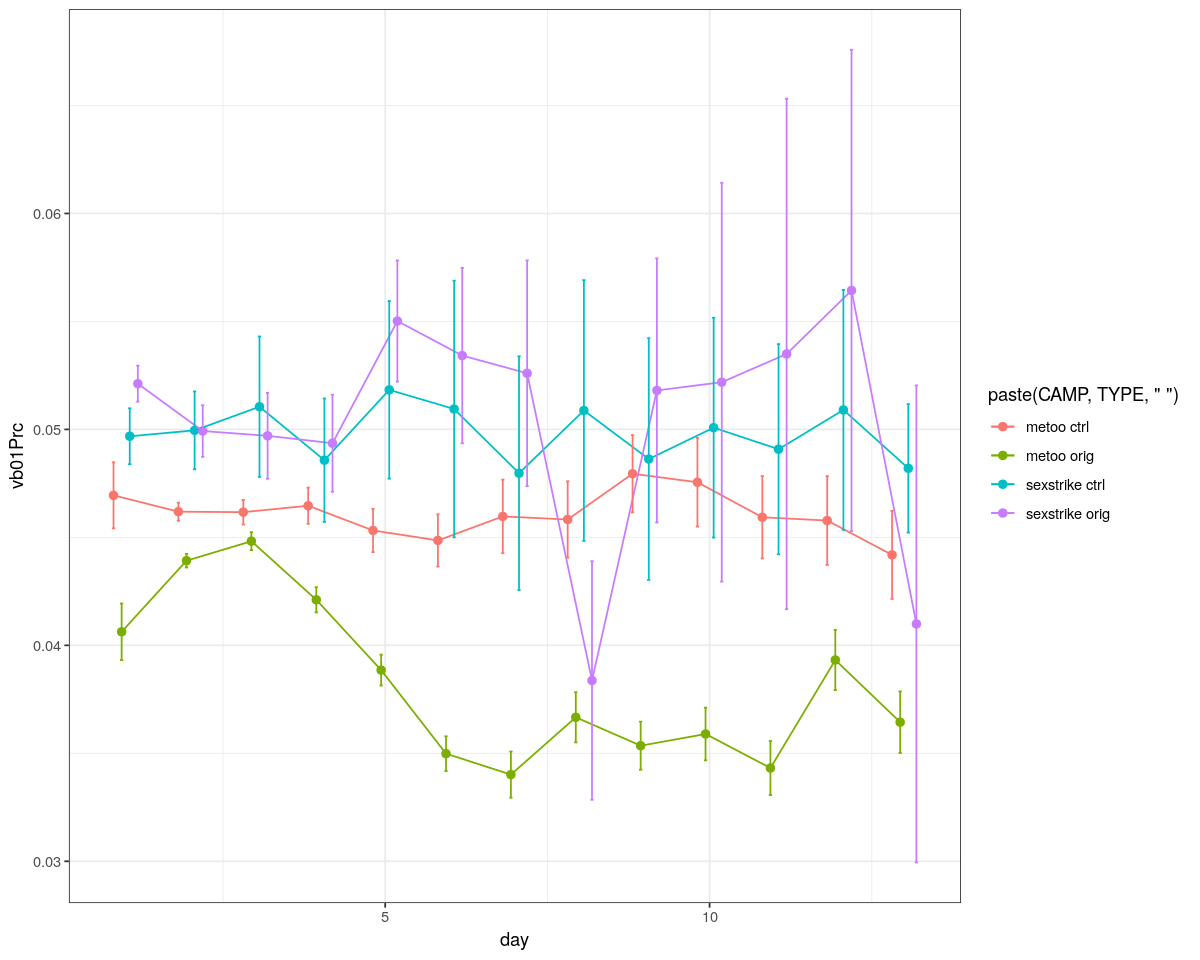

In [98]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.5)
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc,color=paste(CAMP,TYPE," ") ))
## gg0 <- gg0+geom_point(position = position_jitter(0.4), alpha = 1/100)
## gg0 <- gg0+ggbeeswarm::geom_quasirandom(alpha = 0.3)
gg0 <- gg0+stat_summary(position = jt0, geom = "point", fun.data = mean_cl_normal, size = 2)
gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun.data = mean_cl_normal, size = 0.5)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
gg0 <- gg0+theme_bw()
gg0

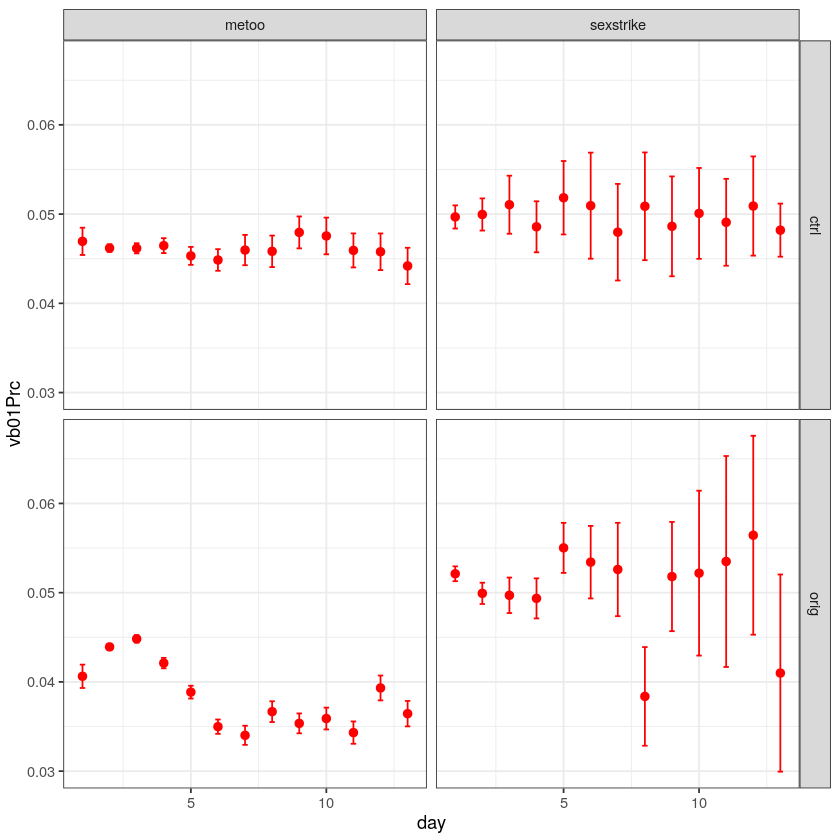

In [58]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc))+
  ## geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

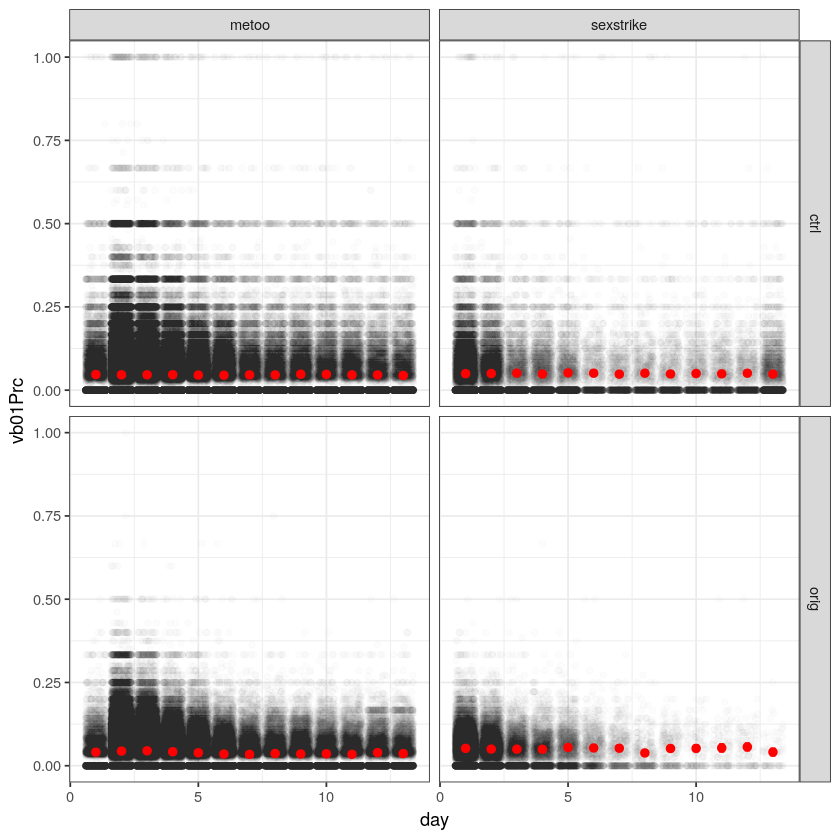

In [59]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc))+
  geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

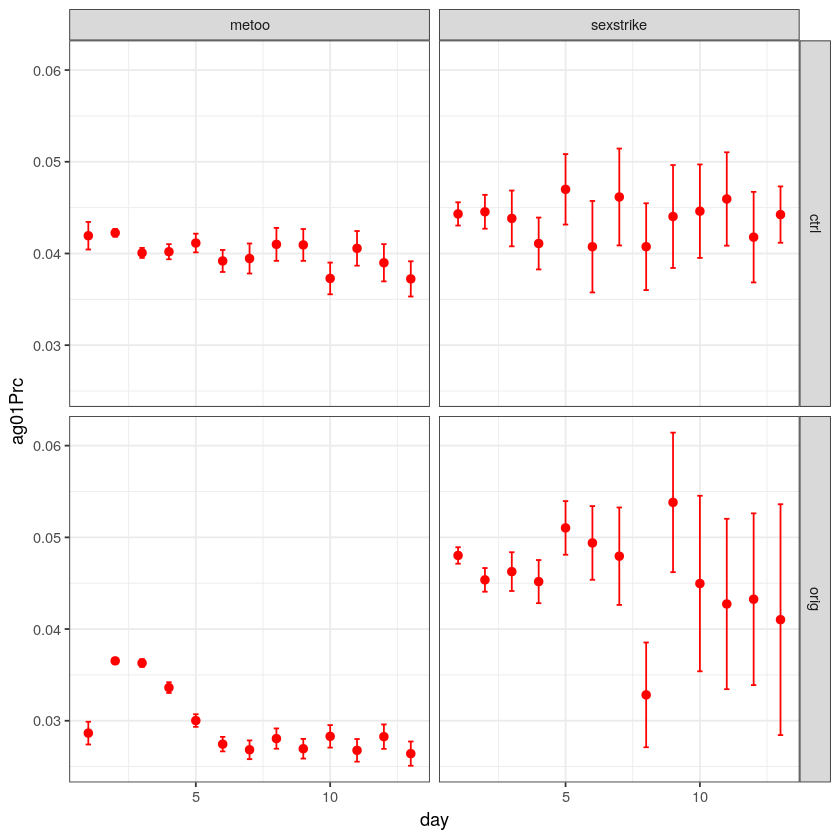

In [60]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = ag01Prc))+
  ## geom_point(position = position_jitter(0.4), alpha = 1/10)+
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

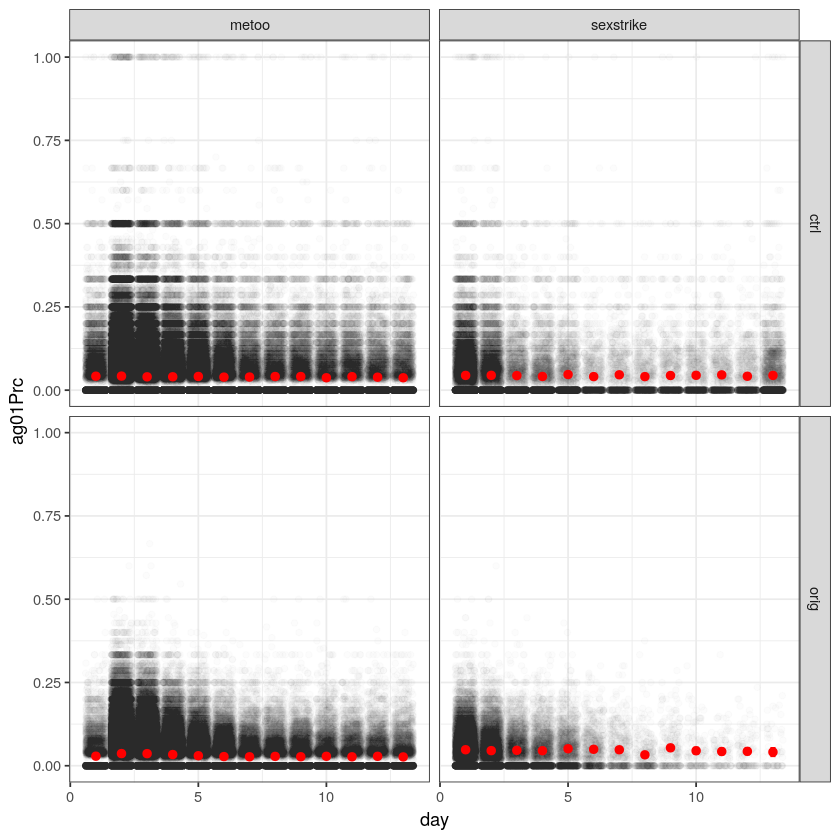

In [61]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = ag01Prc))+
  geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

# ANOVA (`aov_4`)

| name         | meta   | descr                       |
|--------------|--------|-----------------------------|
| `ID`         | `u1`   | observation unit (tweet_id) |
| `vb01Prc`    | `d1`   | outcome (dependent)         |
| `ag01Prc`    | `d2`   | outcome (dependent)         |
| `CAMP`       | `b1`   | between tweet               |
| `TYPE`       | `b2`   | between tweet               |


| name         | meta   | descr                       |
|--------------|--------|-----------------------------|
| `day`        | `b3`   | between tweet               |

In [21]:
OBSERVED <- c("CAMP","TYPE")

In [22]:
OBSERVED <- NULL

In [23]:
FACTORIZE <- TRUE

In [24]:
FACTORIZE <- FALSE

In [25]:
FORMULA <- vb01Prc~CAMP*TYPE*day+(1|ID)

log0 <- logging0(idPath,ifName,odPath,infoStr="_aov_4_a1vb01Prc",data=df2)
a1vb01Prc <- aov_4(
    formula       <- FORMULA,
    data          <- df2,
    observed      <- OBSERVED,
)
save(a1vb01Prc,file=log0$ofPath)
log1 <- logging1(log0$lfPath,log0$t0)

ifPath: data/t1305/bigDF__df2.RData
ofPath: data/t1306/bigDF__df2.RData__2020-10-10_04:50:34__6f2a2672a3c4__aov_4_a1vb01Prc__nrow_717219.RData
lfPath: data/t1306/bigDF__df2.RData__2020-10-10_04:50:34__6f2a2672a3c4__aov_4_a1vb01Prc__nrow_717219.RData.LOG.txt
timeSt: 2020-10-10 04:50:34
nrows : 717219
ncols : 34
vList : data, idPath, ifName, ifPath, infoStr, lfPath, odPath, ofName, ofPath, ofTemp, ofTime, t0



Converting to factor: day

Contrasts set to contr.sum for the following variables: CAMP, TYPE, day



time1: 2020-10-10 04:53:18
diff1: Time difference of 2.741966 mins



In [27]:
FORMULA <- ag01Prc~CAMP*TYPE*day+(1|ID)

log0 <- logging0(idPath,ifName,odPath,infoStr="_aov_4_a2ag01Prc",data=df2)
a2ag01Prc <- aov_4(
    formula       <- FORMULA,
    data          <- df2,
    observed      <- OBSERVED
)
save(a2ag01Prc,file=log0$ofPath)
log1 <- logging1(log0$lfPath,log0$t0)

ifPath: data/t1305/bigDF__df2.RData
ofPath: data/t1306/bigDF__df2.RData__2020-10-10_04:55:16__6f2a1c2c47cf__aov_4_a2ag01Prc__nrow_717219.RData
lfPath: data/t1306/bigDF__df2.RData__2020-10-10_04:55:16__6f2a1c2c47cf__aov_4_a2ag01Prc__nrow_717219.RData.LOG.txt
timeSt: 2020-10-10 04:55:16
nrows : 717219
ncols : 34
vList : data, idPath, ifName, ifPath, infoStr, lfPath, odPath, ofName, ofPath, ofTemp, ofTime, t0



Converting to factor: day

Contrasts set to contr.sum for the following variables: CAMP, TYPE, day



time1: 2020-10-10 04:57:51
diff1: Time difference of 2.585493 mins



# Quick look at AOV results

In [62]:
summary(a1vb01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,717167,0.004864705,146.343861,2.040166e-04,1.100157e-33
TYPE,1,717167,0.004864705,30.365846,4.233960e-05,3.578948e-08
day,12,717167,0.004864705,2.745068,4.592975e-05,9.890038e-04
CAMP:TYPE,1,717167,0.004864705,41.030448,5.720857e-05,1.499683e-10
CAMP:day,12,717167,0.004864705,4.326585,7.238936e-05,6.411868e-07
TYPE:day,12,717167,0.004864705,1.941370,3.248293e-05,2.531378e-02
CAMP:TYPE:day,12,717167,0.004864705,4.125989,6.903335e-05,1.702643e-06


In [63]:
summary(a2ag01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,717167,0.004799018,228.299732,3.182342e-04,1.425958e-51
TYPE,1,717167,0.004799018,44.527087,6.208362e-05,2.510434e-11
day,12,717167,0.004799018,5.342989,8.939359e-05,3.974392e-09
CAMP:TYPE,1,717167,0.004799018,87.561657,1.220789e-04,8.191664e-21
CAMP:day,12,717167,0.004799018,7.471088,1.249944e-04,5.775772e-14
TYPE:day,12,717167,0.004799018,2.836176,4.745407e-05,6.663755e-04
CAMP:TYPE:day,12,717167,0.004799018,5.111633,8.552311e-05,1.286237e-08


# Estimated marginal means (Least-squares means)

## Full model

In [64]:
a1vb01PrcEm1 <- emmeans(a1vb01Prc, specs<-c("CAMP", "TYPE", "day"))
a2ag01PrcEm1 <- emmeans(a2ag01Prc, specs<-c("CAMP", "TYPE", "day"))

In [ ]:
a1vb01PrcEm1

In [ ]:
a2ag01PrcEm1

In [ ]:
pairs(a1vb01PrcEm1)

In [ ]:
pairs(a2ag01PrcEm1)

In [ ]:
TEST=adjusted("bonferroni")

In [ ]:
TEST=adjusted("free")

In [ ]:
summary(as.glht(pairs(a1vb01PrcEm1)),test=TEST)

In [ ]:
summary(as.glht(pairs(a2ag01PrcEm1)),test=TEST)

### Contrasts

In [ ]:
coef(contrast(a2ag01PrcEm1))

In [ ]:
coef(contrast(a1vb01PrcEm1))

## Em2

In [65]:
a1vb01PrcEm2 <- emmeans(a1vb01Prc, specs<-c("TYPE", "CAMP"), by<-"day")
a2ag01PrcEm2 <- emmeans(a2ag01Prc, specs<-c("TYPE", "CAMP"), by<-"day")

In [ ]:
a1vb01PrcEm2

In [ ]:
a2ag01PrcEm2

In [ ]:
pairs(a1vb01PrcEm2)

In [ ]:
pairs(a2ag01PrcEm2)

In [ ]:
summary(as.glht(pairs(a1vb01PrcEm2)),test=TEST)

In [ ]:
summary(as.glht(pairs(a2ag01PrcEm2)),test=TEST)

# Third split

In [73]:
a1vb01PrcEm3 <- emmeans(a1vb01Prc, specs<-"day", by<-c("TYPE", "CAMP"))
a2ag01PrcEm3 <- emmeans(a2ag01Prc, specs<-"day", by<-c("TYPE", "CAMP"))

In [76]:
a1vb01PrcEm3

TYPE = ctrl, CAMP = metoo:
 day emmean       SE     df lower.CL upper.CL
 1   0.0469 0.000668 717167   0.0456   0.0483
 2   0.0462 0.000189 717167   0.0458   0.0466
 3   0.0462 0.000251 717167   0.0457   0.0467
 4   0.0465 0.000366 717167   0.0457   0.0472
 5   0.0453 0.000454 717167   0.0444   0.0462
 6   0.0449 0.000555 717167   0.0438   0.0459
 7   0.0460 0.000740 717167   0.0445   0.0474
 8   0.0458 0.000784 717167   0.0443   0.0474
 9   0.0479 0.000784 717167   0.0464   0.0495
 10  0.0476 0.000840 717167   0.0459   0.0492
 11  0.0459 0.000837 717167   0.0443   0.0476
 12  0.0458 0.000908 717167   0.0440   0.0476
 13  0.0442 0.000906 717167   0.0424   0.0460

TYPE = orig, CAMP = metoo:
 day emmean       SE     df lower.CL upper.CL
 1   0.0406 0.000878 717167   0.0389   0.0423
 2   0.0439 0.000206 717167   0.0435   0.0443
 3   0.0448 0.000273 717167   0.0443   0.0454
 4   0.0421 0.000400 717167   0.0413   0.0429
 5   0.0389 0.000497 717167   0.0379   0.0398
 6   0.0350 0.000606 7171

In [77]:
a2ag01PrcEm3

TYPE = ctrl, CAMP = metoo:
 day emmean       SE     df lower.CL upper.CL
 1   0.0419 0.000663 717167   0.0406   0.0432
 2   0.0422 0.000187 717167   0.0419   0.0426
 3   0.0401 0.000249 717167   0.0396   0.0406
 4   0.0402 0.000364 717167   0.0395   0.0409
 5   0.0411 0.000451 717167   0.0403   0.0420
 6   0.0392 0.000551 717167   0.0381   0.0403
 7   0.0395 0.000735 717167   0.0380   0.0409
 8   0.0410 0.000778 717167   0.0395   0.0425
 9   0.0409 0.000779 717167   0.0394   0.0425
 10  0.0373 0.000834 717167   0.0356   0.0389
 11  0.0406 0.000832 717167   0.0389   0.0422
 12  0.0390 0.000902 717167   0.0372   0.0408
 13  0.0372 0.000900 717167   0.0355   0.0390

TYPE = orig, CAMP = metoo:
 day emmean       SE     df lower.CL upper.CL
 1   0.0287 0.000872 717167   0.0269   0.0304
 2   0.0365 0.000205 717167   0.0361   0.0369
 3   0.0363 0.000272 717167   0.0358   0.0368
 4   0.0336 0.000397 717167   0.0328   0.0344
 5   0.0300 0.000494 717167   0.0291   0.0310
 6   0.0275 0.000602 7171

In [78]:
pairs(a1vb01PrcEm2)

day = 1:
 contrast                         estimate       SE     df t.ratio p.value
 ctrl metoo - orig metoo          6.32e-03 0.001103 717167   5.727 <.0001 
 ctrl metoo - ctrl sexstrike     -2.74e-03 0.000848 717167  -3.226 0.0069 
 ctrl metoo - orig sexstrike     -5.17e-03 0.000883 717167  -5.854 <.0001 
 orig metoo - ctrl sexstrike     -9.06e-03 0.001022 717167  -8.860 <.0001 
 orig metoo - orig sexstrike     -1.15e-02 0.001051 717167 -10.930 <.0001 
 ctrl sexstrike - orig sexstrike -2.43e-03 0.000779 717167  -3.125 0.0096 

day = 2:
 contrast                         estimate       SE     df t.ratio p.value
 ctrl metoo - orig metoo          2.27e-03 0.000279 717167   8.118 <.0001 
 ctrl metoo - ctrl sexstrike     -3.77e-03 0.000764 717167  -4.931 <.0001 
 ctrl metoo - orig sexstrike     -3.73e-03 0.000849 717167  -4.397 0.0001 
 orig metoo - ctrl sexstrike     -6.03e-03 0.000768 717167  -7.855 <.0001 
 orig metoo - orig sexstrike     -6.00e-03 0.000853 717167  -7.035 <.0001 
 ctrl 

In [79]:
pairs(a2ag01PrcEm2)

day = 1:
 contrast                         estimate       SE     df t.ratio p.value
 ctrl metoo - orig metoo          0.013283 0.001096 717167  12.120 <.0001 
 ctrl metoo - ctrl sexstrike     -0.002378 0.000842 717167  -2.822 0.0246 
 ctrl metoo - orig sexstrike     -0.006089 0.000877 717167  -6.942 <.0001 
 orig metoo - ctrl sexstrike     -0.015661 0.001015 717167 -15.428 <.0001 
 orig metoo - orig sexstrike     -0.019372 0.001044 717167 -18.554 <.0001 
 ctrl sexstrike - orig sexstrike -0.003712 0.000774 717167  -4.797 <.0001 

day = 2:
 contrast                         estimate       SE     df t.ratio p.value
 ctrl metoo - orig metoo          0.005719 0.000278 717167  20.609 <.0001 
 ctrl metoo - ctrl sexstrike     -0.002298 0.000759 717167  -3.029 0.0131 
 ctrl metoo - orig sexstrike     -0.003112 0.000844 717167  -3.690 0.0013 
 orig metoo - ctrl sexstrike     -0.008017 0.000763 717167 -10.507 <.0001 
 orig metoo - orig sexstrike     -0.008831 0.000848 717167 -10.420 <.0001 
 ctrl 

# HANDY PLOTS

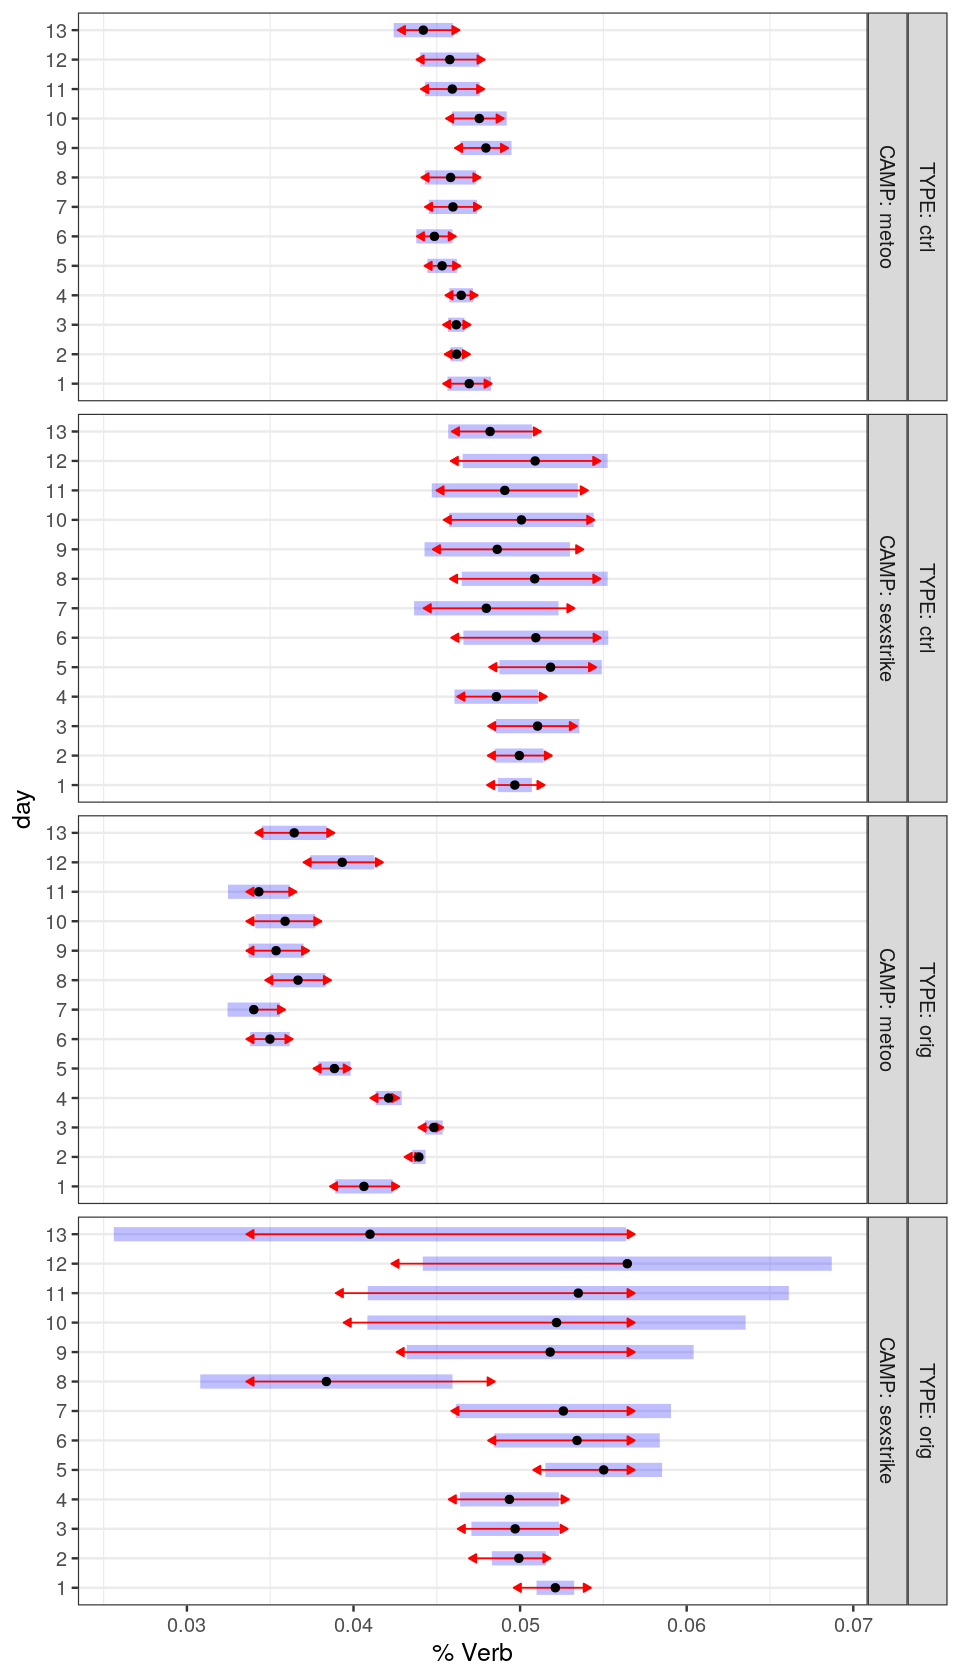

In [75]:
plot(a1vb01PrcEm3, comparisons=TRUE, xlab="% Verb")

# Handy plots

In [ ]:
#                      ___           ___                    ___           ___                   
#                     /\  \         /\__\                  /\__\         /\  \         _____    
#        ___          \:\  \       /:/ _/_                /:/ _/_        \:\  \       /::\  \   
#       /\__\          \:\  \     /:/ /\__\              /:/ /\__\        \:\  \     /:/\:\  \  
#      /:/  /      ___ /::\  \   /:/ /:/ _/_            /:/ /:/ _/_   _____\:\  \   /:/  \:\__\ 
#     /:/__/      /\  /:/\:\__\ /:/_/:/ /\__\          /:/_/:/ /\__\ /::::::::\__\ /:/__/ \:|__|
#    /::\  \      \:\/:/  \/__/ \:\/:/ /:/  /          \:\/:/ /:/  / \:\~~\~~\/__/ \:\  \ /:/  /
#   /:/\:\  \      \::/__/       \::/_/:/  /            \::/_/:/  /   \:\  \        \:\  /:/  / 
#   \/__\:\  \      \:\  \        \:\/:/  /              \:\/:/  /     \:\  \        \:\/:/  /  
#        \:\__\      \:\__\        \::/  /                \::/  /       \:\__\        \::/  /   
#         \/__/       \/__/         \/__/                  \/__/         \/__/         \/__/    
#  




Quote from: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
> The blue bars are confidence intervals for the EMMs, and the red arrows are for the comparisons among them. If an arrow from one mean overlaps an arrow from another group, the difference is not “significant,” based on the adjust setting (which defaults to "tukey") and the value of alpha (which defaults to 0.05). See the “xplanations” supplement for details on how these are derived.

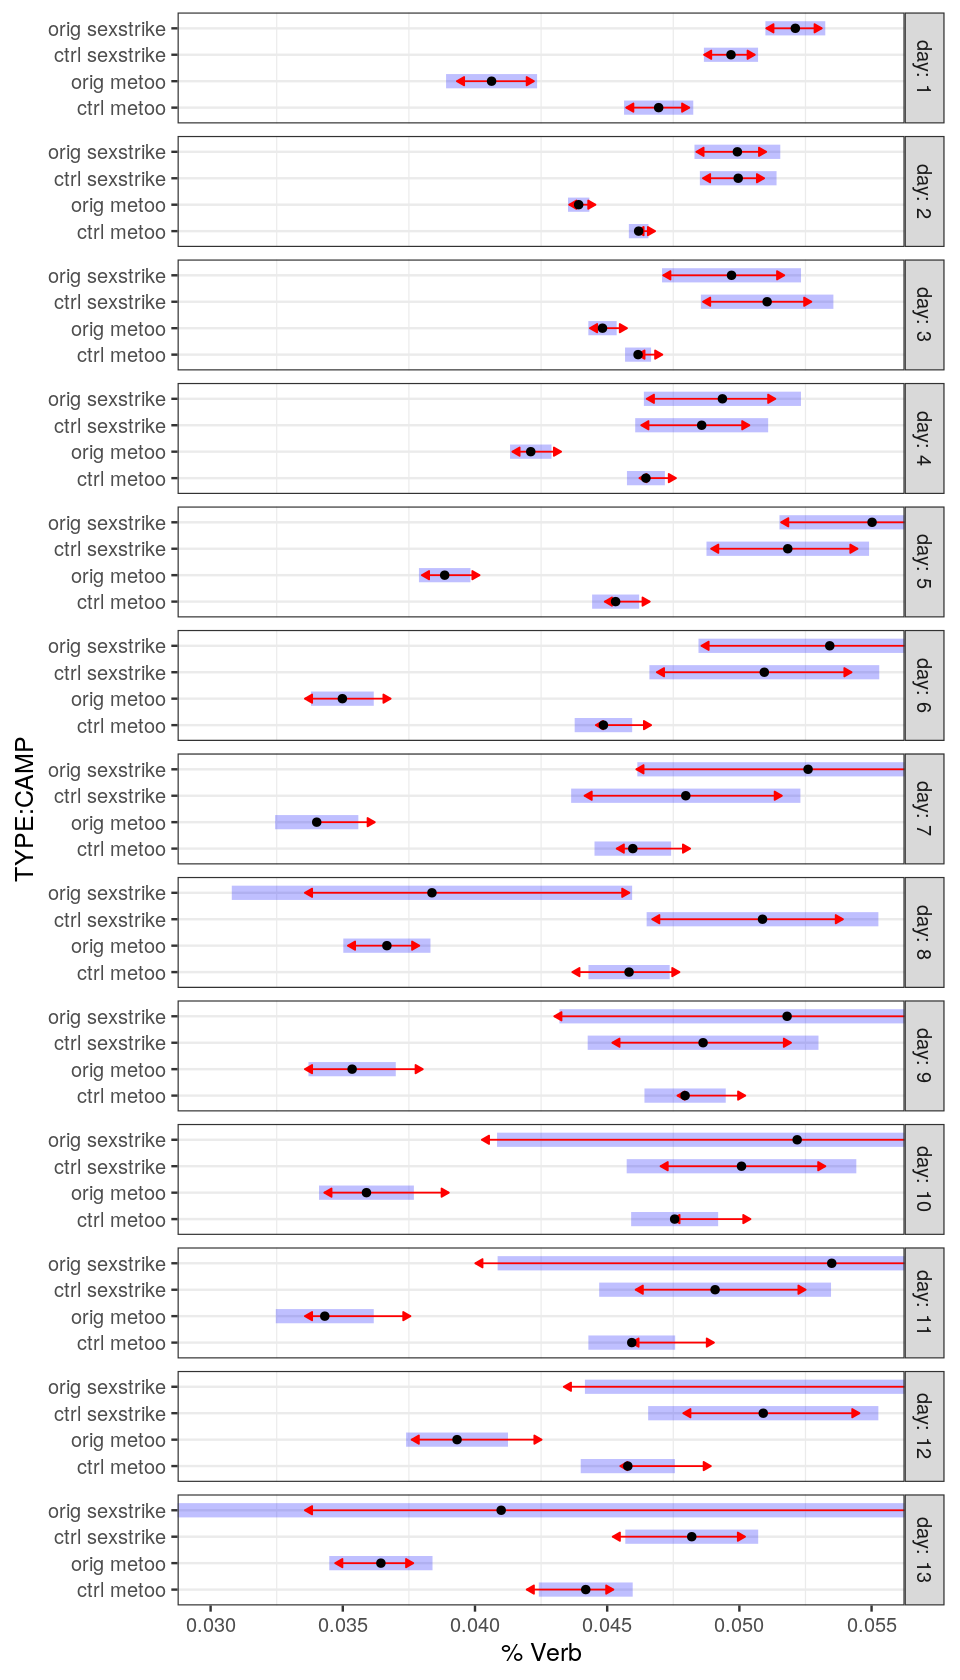

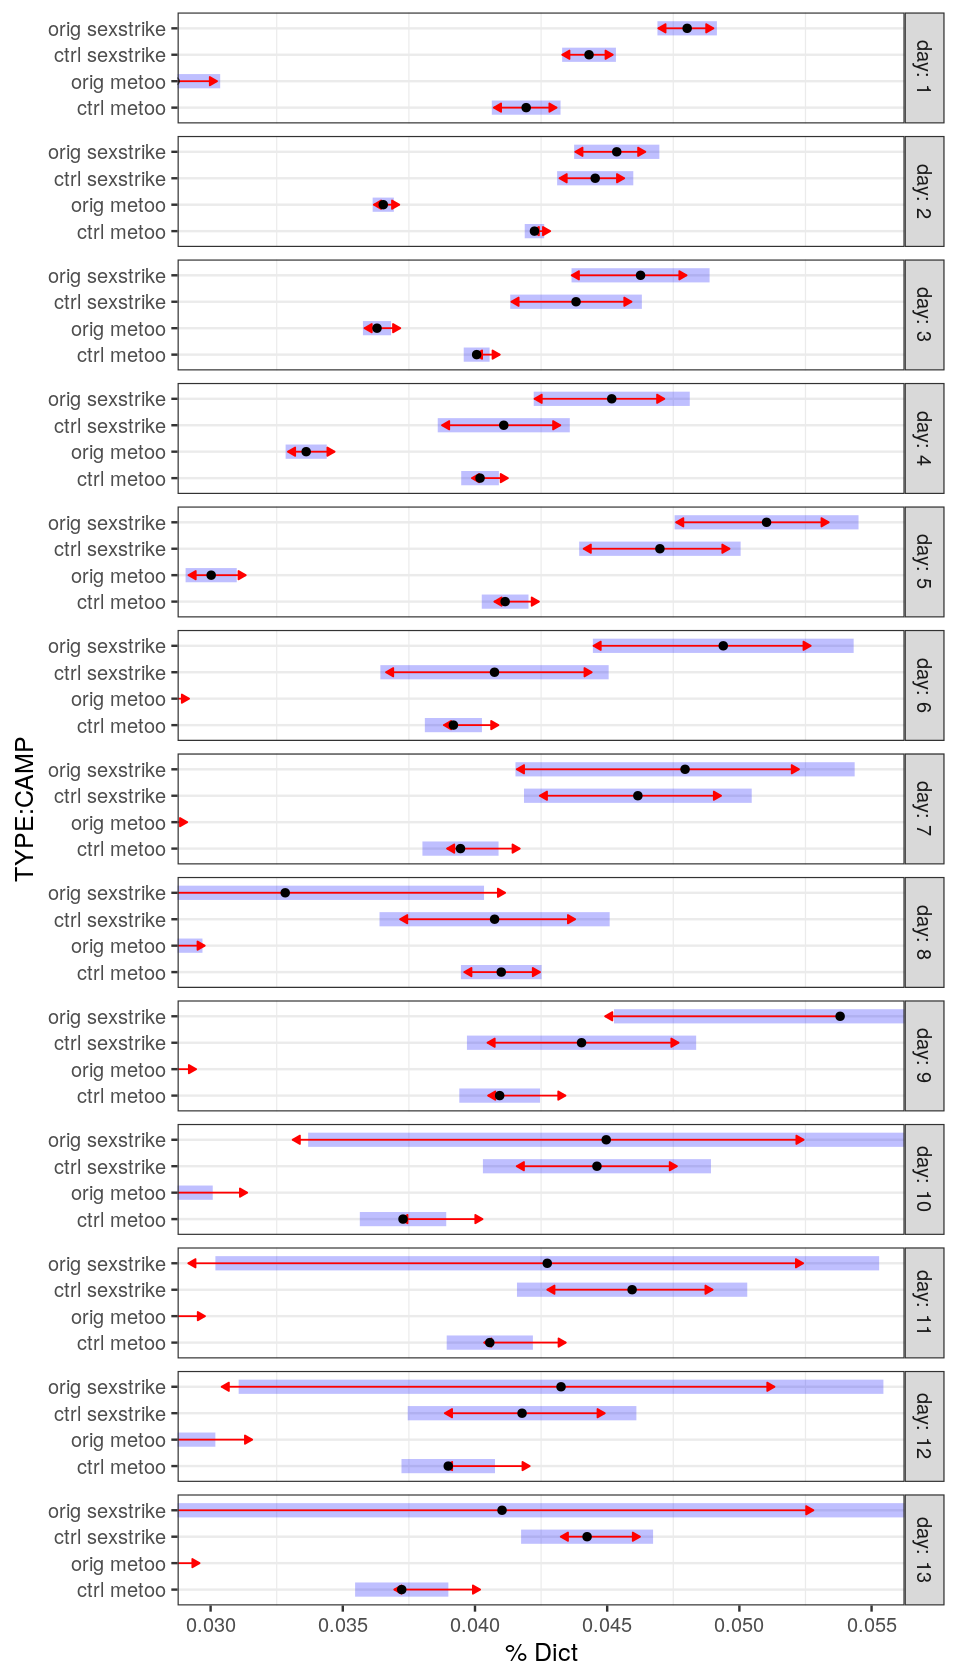

In [72]:
library(repr)
options(repr.plot.width=8, repr.plot.height=14)
# fig.height = 10
# fig.width = 5
plot(a1vb01PrcEm2, comparisons=TRUE, xlab="% Verb")+
coord_fixed(ratio = 0.001,xlim=c(0.030, 0.055),ylim=NULL,expand=TRUE,clip="on")
#+ 
#  theme(
#      plot.margin = margin(.2,.2,.2,.2, "cm"),
#      plot.background = element_rect(fill = "darkgrey")
#  )

plot(a2ag01PrcEm2, comparisons=TRUE, xlab="% Dict")+
coord_fixed(ratio = 0.001,xlim=c(0.030, 0.055),ylim=NULL,expand=TRUE,clip="on")


# Helpers

In [ ]:
?mixed

In [ ]:
?scale

In [ ]:
?lmer

In [ ]:
?aov_4

In [ ]:
?emmeans

In [ ]:
?coord_fixed

# Extras

In [ ]:
df2$retweets <- as.numeric(df2$retweets) # TODO FIXME This should be fixed elsewhere!

In [ ]:
df2$ReTw <- cut(df2$retweets,
                breaks=c(0, 5, 25, 125, Inf), 
                right  = FALSE,
              # labels=c("low","med","high","viral")
               )

str(df2)

# Playground

In [ ]:
plot_grid(
  afex_plot(
      a1vb01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) + 
    coord_cartesian(ylim = c(0, 1)),
  afex_plot(
      a2ag01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) +
    coord_cartesian(ylim = c(0, 1))
)

In [ ]:
qqPlot(a1vb01Prc$aov$residuals)

In [ ]:
qqPlot(a2ag01Prc$aov$residuals)

In [ ]:
shapiro.test(a1vb01Prc$aov$residuals)

In [ ]:
shapiro.test(a2ag01Prc$aov$residuals)

In [ ]:
ad.test(a1vb01Prc$aov$residuals)$p.value

In [ ]:
ad.test(a2ag01Prc$aov$residuals)$p.value

In [ ]:
test_levene(a1vb01Prc)

In [ ]:
test_levene(a2ag01Prc)

In [ ]:
library("pwr")

In [ ]:
?pwr.anova.test

In [ ]:
?summary